In [1]:
import pandas as pd
import geopandas as geopd
import matplotlib.pyplot as plt

world = geopd.read_file(geopd.datasets.get_path('naturalearth_lowres'))
ctemp = pd.read_csv('../data/countries_temp.csv')
ctemp.drop(0,inplace=True)
ctemp.reset_index(drop=True, inplace=True)

In [10]:
import os
import matplotlib.pyplot as plt

parent_dir = ".."
part = "affects_on_regions"
path_id = os.path.join(parent_dir,"plots",part)
os.makedirs(path_id)

In [11]:
def save_plot(plot_name,plot_extension="png",resolution=100,tight_layout=True):

    plot_path = os.path.join(path_id,plot_name+'.'+plot_extension)
    plt.savefig(plot_path,dpi=resolution,format=plot_extension)

    print(f"{plot_name} saved to plots.")

In [12]:
#changing names of countries in temperature to match the map
import warnings
warnings.filterwarnings(action='ignore')
ctemp['country'] =ctemp['country'].replace("United States","United States of America")
ctemp['country'] = ctemp['country'].replace("Congo (Democratic Republic of the)","Dem. Rep. Congo")
ctemp['country'] = ctemp['country'].replace("Dominican Republic","Dominican Rep.")
ctemp['country'] = ctemp['country'].replace("Burma","Myanmar")
ctemp['country'] = ctemp['country'].replace("Central African Republic","Central African Rep.")

In [13]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,temp
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1.30
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",1.98
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",3.64
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",2.36
...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",2.27
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",2.14
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",1.60


In [14]:
countries_from_temp = ctemp['country']
countries_from_map = world['name']

In [15]:
#matching the countries in temp and map
locations = []
for country in countries_from_map:
    loc = countries_from_temp.loc[countries_from_temp==country]
    if len(loc.index.values)>0:
        locations.append(loc.index.values[0])
    else:
        locations.append(None)

In [16]:
#appending the temperature to world
temp_column= []
for index,country in enumerate(world.name):
    if locations[index] != None:
        temp = ctemp.loc[locations[index]]['temp']
        temp_column.append(temp)
    else:
        temp_column.append(None)
world['temp'] = temp_column

temperature_increase_since_1950 saved to plots.


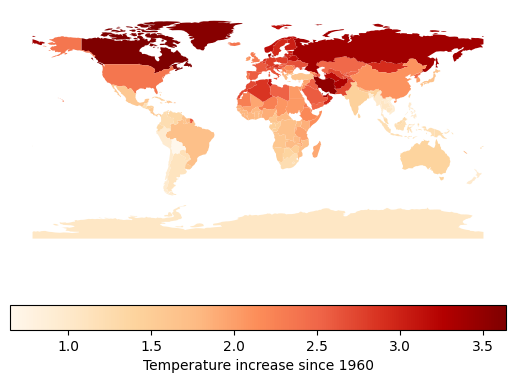

In [17]:
fig,ax= plt.subplots(1,1)
world.plot(column='temp',ax=ax,legend=True,cmap='OrRd',legend_kwds={'label': "Temperature increase since 1960",
'orientation': "horizontal"})
plt.axis(False)
save_plot("temperature_increase_since_1950")
plt.show()

In [18]:
#glaciers data

gdata = pd.read_csv('../data/glacier_database.csv')
gdata.head()

,Glacier ID,Political Unit,Continent,Basin Code,Location Code,Glacier Code,Glacier Name,Latitude,Longitude,Primary Class,...,Maximum Length,Maximum Length Exposed,Maximum Length Ablation,Mean Depth,Depth Accuracy,Accumulation Orientation,Ablation Orientation,Topographic Map Year,Topographic Map Scale,Photograph Year
0,AF5Q112B0001,AFGHANISTAN,ASIA,Q112,B0,1,NaN,34.672,68.874,9.0,...,1.9,NaN,NaN,NaN,NaN,NE,NE,1959.0,100000.0,NaN
1,AF5Q112B0002,AFGHANISTAN,ASIA,Q112,B0,2,NaN,34.676,68.855,9.0,...,0.8,NaN,NaN,NaN,NaN,NW,NW,1959.0,100000.0,NaN
2,AF5Q112B0003,AFGHANISTAN,ASIA,Q112,B0,3,NaN,34.689,68.854,9.0,...,1.5,NaN,NaN,NaN,NaN,NW,NW,1959.0,100000.0,NaN
3,AF5Q112B0004,AFGHANISTAN,ASIA,Q112,B0,4,NaN,34.707,68.857,9.0,...,1.5,NaN,NaN,NaN,NaN,NE,NE,1959.0,100000.0,NaN
4,AF5Q112B0005,AFGHANISTAN,ASIA,Q112,B0,5,NaN,34.719,68.852,9.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1959.0,100000.0,NaN


In [19]:
gdata['Political Unit']=gdata['Political Unit'].replace("USSR","RUSSIA")

In [20]:
gdata['Political Unit'] = gdata['Political Unit'].str.lower()
gdata['Political Unit'] = gdata['Political Unit'].str.capitalize()

In [21]:
gdata['Political Unit'] = gdata['Political Unit'].replace("New zealand","New Zealand")
gdata['Political Unit'] = gdata['Political Unit'].replace("United states","United States of America")
gdata['Political Unit'] = gdata['Political Unit'].replace("United states of america","United States of America")
gdata['Political Unit'] = gdata['Political Unit'].replace("South africa","South Africa")

In [22]:
#glacier countries
gcountries = gdata['Political Unit'].value_counts()

In [23]:
#mapping glacier count to world data
glacier_count = []
for country in world.name:
    matched = 0
    for gc in gcountries.index:
        if gc==country:
            glacier_count.append(gcountries[country])
            matched=1
    if matched == 0:
        glacier_count.append(0)

world['glaciers'] = glacier_count


In [24]:
#glacier area
for_glacier_area = gdata.groupby(by='Political Unit')

In [25]:
glacier_area = []
for country in gcountries.index:
    value = for_glacier_area.get_group(country)['Glacier Area'].sum()
    glacier_area.append(value)

In [26]:
glacier_total = []
for country in world.name:
    matched = 0
    for index,gc in enumerate(gcountries.index):
        if gc==country:
            glacier_total.append(glacier_area[index])
            matched=1
    if matched == 0:
        glacier_total.append(0)
world['glacier_area'] = glacier_total

glaciers_count saved to plots.


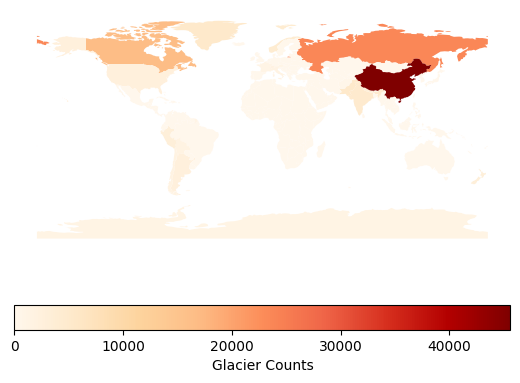

In [27]:
fig, ax = plt.subplots()
world.plot(column='glaciers',ax=ax,legend=True,cmap='OrRd',legend_kwds={'label': "Glacier Counts",
'orientation': "horizontal"})
plt.axis(False)
save_plot("glaciers_count")
plt.show()

glacier_by_area saved to plots.


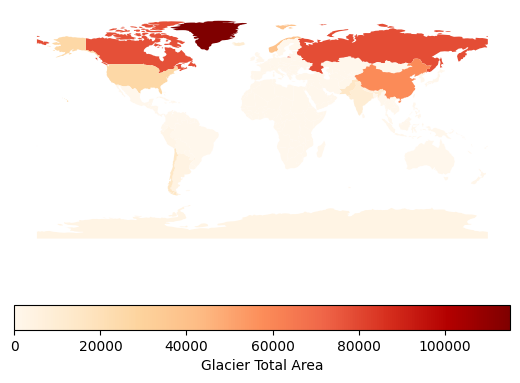

In [28]:
fig, ax = plt.subplots()
world.plot(column='glacier_area',ax=ax,legend=True,cmap='OrRd',legend_kwds={'label': "Glacier Total Area",
'orientation': "horizontal"})
plt.axis(False)
save_plot("glacier_by_area")
plt.show()

In [33]:
sea_level = pd.read_csv('../data/sealevel.csv')

In [34]:
#preparing new dataset for sea level
years = sea_level['Year'].unique()
new_sea_level = pd.DataFrame(data=None)

for year in years:
    helper_df = sea_level.loc[sea_level['Year']==year].copy()
    helper_df.reset_index(drop=True,inplace=True)
    new_sea_level = pd.concat([new_sea_level, helper_df.iloc[:1]],axis=0)

new_sea_level.reset_index(drop=True,inplace=True)

In [35]:
new_sea_level.to_csv("../data/new_sea_level.csv")

In [36]:
#glacier mass balance

gmb = pd.read_csv('../data/glaciers_mass_balance.csv')

In [37]:
gmb.rename(columns={'Mean cumulative mass balance':'mass_balance'},inplace=True)
gmb.head()

,Year,mass_balance,Number of observations
0,1945,0.00,NaN
1,1946,-1.13,1.0
2,1947,-3.19,1.0
3,1948,-3.19,1.0
4,1949,-3.82,3.0


In [38]:
new_gmb = gmb.loc[gmb['Year']>=1993].copy()
new_sea_level = new_sea_level.loc[new_sea_level['Year']<=2015].copy()

In [39]:
def min_max(value,minimum, maximum):
    nom =  value - minimum
    den= maximum - minimum
    scaled = nom/den

    return scaled
new_sea_level['scaled_level'] = new_sea_level['GMSL_noGIA'].apply(min_max,minimum=min(new_sea_level['GMSL_noGIA']),maximum=max(new_sea_level['GMSL_noGIA']))
new_gmb['scaled_mass'] = new_gmb['mass_balance'].apply(min_max,minimum=min(new_gmb['mass_balance']),maximum=max(new_gmb['mass_balance']))

sea_level_vs_glacier_mass_balance saved to plots.


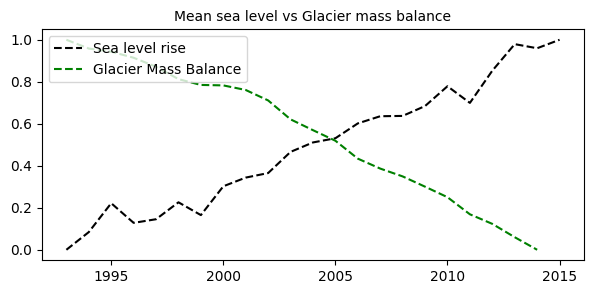

In [41]:
plt.figure(figsize=(7,3))
plt.plot(new_sea_level['Year'],new_sea_level['scaled_level'],'k--',label='Sea level rise')
plt.plot(new_gmb['Year'],new_gmb['scaled_mass'],'g--',label='Glacier Mass Balance')
plt.title("Mean sea level vs Glacier mass balance",fontsize=10)
plt.legend(loc="upper left")
save_plot("sea_level_vs_glacier_mass_balance")
plt.show()
